# Miniproyecto Data Science 📊

Se dispone de un conjunto de datos en el que se recoge información sobre ventas y dinero gastado en distintas campañas de publicidad. Lo priemro que debe hacerse es cargar el archivo csv para crear un dataframe.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(color_codes=True)

sales = pd.read_csv('sales.csv')
sales

,id,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
205,196,38.2,3.7,13.8,7.6
206,197,94.2,4.9,8.1,9.7
207,198,177.0,9.3,6.4,12.8
208,199,NaN,42.0,66.2,25.5


## Paso 1

### Limpieza de datos 🧹

A través de la función `describe()` puede obtenerse información relevante sobre los datos del dataframe

In [2]:
description = sales.describe()
description

,id,TV,radio,newspaper,sales
count,210.000000,2.070000e+02,210.000000,210.000000,210.000000
mean,100.809524,1.449275e+10,23.200476,30.294762,13.959048
std,57.399481,1.198000e+11,14.827575,21.726517,5.196055
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,52.250000,7.405000e+01,10.025000,12.025000,10.400000
50%,101.500000,1.498000e+02,22.400000,25.750000,12.900000
75%,149.750000,2.200500e+02,36.575000,44.900000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


Puede observarse que en la columna de **TV** hay menos datos que en las demás, lo que indica que debe haber datos vacíos. Además, en la columna **id** el máximo es 200, sin embargo, hay 210 filas, por lo que debe haber datos repetidos. 
Para solucionar esto, se hace lo siguiente: 

In [3]:
clean_sales = sales.dropna(axis=0, how='any').drop_duplicates(subset=['id'])
clean_sales.describe()

,id,TV,radio,newspaper,sales
count,197.000000,1.970000e+02,197.000000,197.000000,197.000000
mean,99.796954,1.522843e+10,22.986294,30.158883,13.879188
std,57.788225,1.227723e+11,14.765475,21.675698,5.112512
min,1.000000,7.000000e-01,0.000000,0.300000,1.600000
25%,50.000000,7.340000e+01,9.900000,12.600000,10.300000
50%,100.000000,1.498000e+02,22.300000,25.600000,12.900000
75%,150.000000,2.203000e+02,36.300000,43.300000,17.300000
max,200.000000,1.000000e+12,49.600000,114.000000,27.000000


Otra cosa a tener en cuenta es que el valor máximo de la columna **TV** es varios órdenes de magnitud mayor que los demás (10<sup>12</sup>). Dichos valores deben eliminarse, pues se salen del rango. 

In [4]:
clean_sales.sort_values(by='TV', ascending=False)

,id,TV,radio,newspaper,sales
15,15,1.000000e+12,32.9,46.0,19.0
58,58,1.000000e+12,19.2,16.6,13.2
98,95,1.000000e+12,14.0,10.9,11.5
105,102,2.964000e+02,36.3,100.9,23.8
43,43,2.936000e+02,27.7,1.8,20.7
...,...,...,...,...,...
131,127,7.800000e+00,38.9,50.6,6.6
57,57,7.300000e+00,28.1,41.4,5.5
81,79,5.400000e+00,29.9,9.4,5.3
165,156,4.100000e+00,11.6,5.7,3.2


El siguiente valor más alto después de los comentados es de 296, por lo que es interesante aplicar una máscara para filtrar aquellos valores que sean menores de 300.

In [5]:
clean_sales = clean_sales[clean_sales.TV < 300] 
clean_sales.describe()

,id,TV,radio,newspaper,sales
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,100.474227,145.444845,23.001031,30.246392,13.868557
std,57.831646,86.032061,14.846077,21.747570,5.135792
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.250000,71.300000,9.675000,12.650000,10.300000
50%,101.500000,148.500000,22.400000,25.600000,12.850000
75%,150.750000,218.475000,36.450000,43.275000,17.275000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Figuras y regresión lineal 📈

A continuación, se representa el número de ventas frente a cada una de las columnas que indican el dinero destinado a cada medio. Se quiere saber si la dependencia de estos datos es lineal, para lo cual, además de la representación, se calcula el [coeficiente de correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), mostrándose en cada una de las figuras. 


Text(0, 0.5, 'Thousands of units sold')

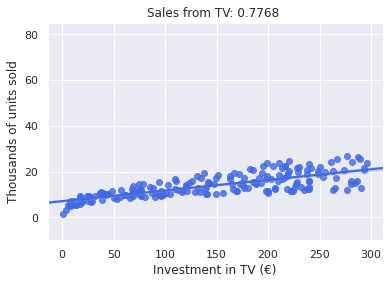

In [6]:
tv_sales_corr = np.corrcoef(clean_sales['TV'], clean_sales['sales'])

plt.ylim(-10, 85)
tv_sales = sns.regplot(data=clean_sales, x=clean_sales['TV'], y=clean_sales['sales'], fit_reg=True, truncate=False, color = 'royalblue')
plt.title(f'Sales from TV: {tv_sales_corr[0][1]:.4f} ')
plt.xlabel('Investment in TV (€)')
plt.ylabel('Thousands of units sold')


Text(0, 0.5, 'Thousands of units sold')

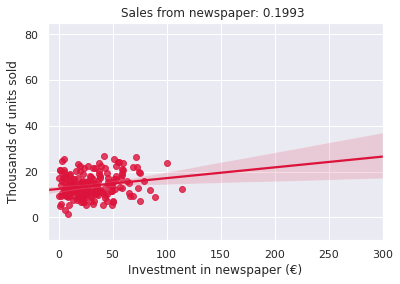

In [7]:
newpaper_sales_corr = np.corrcoef(clean_sales['newspaper'], clean_sales['sales'])

plt.xlim(-10,300)
plt.ylim(-10, 85)
tv_sales = sns.regplot(data=clean_sales, x=clean_sales['newspaper'], y=clean_sales['sales'], fit_reg=True, truncate=False, color= 'crimson')
plt.title(f'Sales from newspaper: {newpaper_sales_corr[0][1]:.4f} ')
plt.xlabel('Investment in newspaper (€)')
plt.ylabel('Thousands of units sold')

Text(0, 0.5, 'Thousands of units sold')

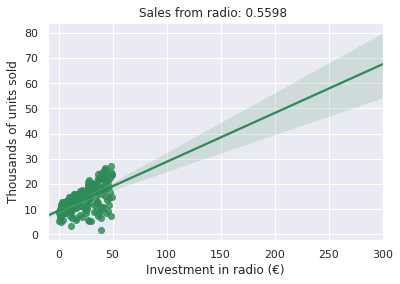

In [8]:
radio_sales_corr = np.corrcoef(clean_sales['radio'], clean_sales['sales'])

plt.xlim(-10,300)
tv_sales = sns.regplot(data=clean_sales, x=clean_sales['radio'], y=clean_sales['sales'], fit_reg=True, truncate=False, color= 'seagreen')
plt.title(f'Sales from radio: {radio_sales_corr[0][1]:.4f} ')
plt.xlabel('Investment in radio (€)')
plt.ylabel('Thousands of units sold')

Los coeficientes de correlación indican que el número de ventas aumentan al aumentar la inversión en los tres medios. Sin embargo, sólo la inversión en **TV** presenta una clara correlación lineal. Esto puede deberse a que las cantidades invertidas en este medio son menos uniformes, es decir, los puntos se extienden más a lo largo del eje de las x, mientras que en los otros dos casos el rango en x es mucho menor. 

## Paso 2

### Campañas exitosas 🏆

Se quiere saber cuántas de las campañas lanzadas resultaron exitosas. Para ello, se debe conocer la cantidad total invertida por cada venta. 

In [9]:
total_investments = (clean_sales['TV'] + clean_sales['newspaper'] + clean_sales['radio']) / clean_sales['sales']
clean_sales['Total investments'] = total_investments
clean_sales

,id,TV,radio,newspaper,sales,Total investments
0,1,230.1,37.8,69.2,22.1,15.253394
1,2,44.5,39.3,45.1,10.4,12.394231
2,3,17.2,45.9,69.3,9.3,14.236559
3,4,151.5,41.3,58.5,18.5,13.583784
4,5,180.8,10.8,58.4,12.9,19.379845
...,...,...,...,...,...,...
204,195,149.7,35.6,6.0,17.3,11.057803
205,196,38.2,3.7,13.8,7.6,7.328947
206,197,94.2,4.9,8.1,9.7,11.051546
207,198,177.0,9.3,6.4,12.8,15.054688


Las condiciones que deben cumplirse para considerar una campaña exitosa son:

- El total de dinero invertido por venta debe ser menor de 20€

- El número de unidades vendidas debe ser mayor de 15000

In [10]:
clean_sales ['success'] = np.where((clean_sales['Total investments'] < 20) & (clean_sales['sales'] > 15), True, False)
clean_sales.success.value_counts()

False    124
True      70
Name: success, dtype: int64

De acuerdo con las condiciones, hubo 70 campañas exitosas.

## Paso 3

### Creación de conjunto de entrenamiento y prueba 🧪

El primer paso es decidir que porcentaje del total de los datos se va a destinar a entrenamiento y qué porcentaje se va a destinar a probar el modelo. 

Scikit cuenta con la función `sklearn.model_selection.train_test_split()` para este propósito. 

En este caso, se quieren seleccionar aquellos datos con id <= 160 para que sean el conjunto de entrenamiento, por lo tanto:

In [11]:
from sklearn.model_selection import train_test_split

x = clean_sales[['TV', 'newspaper', 'radio']]
y = clean_sales['success']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state=42, shuffle=False)

### Entrenamiento de clasificadores 🚴‍♀️

A continuación, se quieren entrenar tres clasificadores: 

- Gaussian Naive-Bayes
- Regresión Logística
- Random Forest

El objetivo es que estos modelos sean capaces de predecir si una campaña será o no exitosa en base al dinero invertido en cada uno de los canales de comunicación.

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

classifiers = [GaussianNB(), LogisticRegression(random_state=0), RandomForestClassifier(max_depth=2, random_state=0)]

for clf in classifiers: 
    fitting = clf.fit(x_train, y_train)
    score = clf.score(x_train, y_train)
    print(f'Fracción clasificada correctamente para {clf}: {score:.2f}')

Fracción clasificada correctamente para GaussianNB(): 0.94
Fracción clasificada correctamente para LogisticRegression(random_state=0): 0.93
Fracción clasificada correctamente para RandomForestClassifier(max_depth=2, random_state=0): 0.96


Se observa que el clasificador Random Forest es el que logra mayor porcentaje de aciertos.

## Paso 4

### Evaluación del rendimiento de los clasificadores 📑

Se aplica ahora la función `score()` sobre el conjunto de prueba.

In [13]:
for clf in classifiers: 
    score = clf.score(x_test, y_test)
    print(f'Fracción clasificada correctamente para {clf}: {score:.2f}')

Fracción clasificada correctamente para GaussianNB(): 0.97
Fracción clasificada correctamente para LogisticRegression(random_state=0): 0.97
Fracción clasificada correctamente para RandomForestClassifier(max_depth=2, random_state=0): 0.95


Se observa un cambio respecto al conjunto de entrenamiento. Ahora son el modelo Gaussian NB y la regresión logística los que predicen de manera más exacta el éxito de una campaña.

Scikit permite evaluar el número de falsos positivos y falsos negativos a través de la matriz de confusión. 

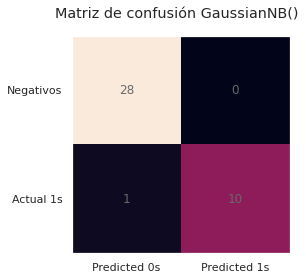

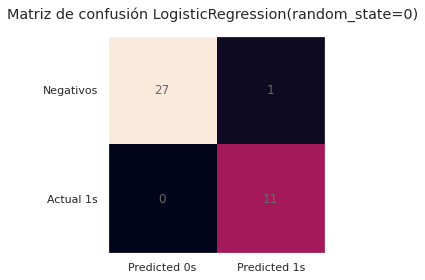

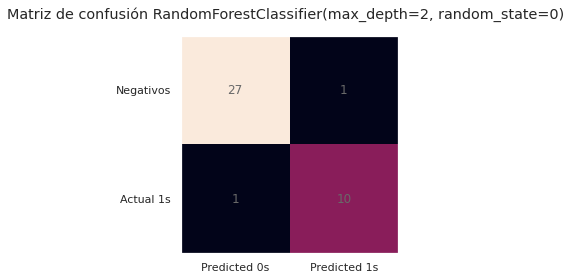

In [14]:
from sklearn.metrics import precision_score, confusion_matrix

for clf in classifiers:
    cm = confusion_matrix(y_test, clf.predict(x_test))
    fig, ax = plt.subplots(figsize=(4, 4))
    fig.suptitle(f'Matriz de confusión {clf}')
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Negativos', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='dimgrey')
    plt.show()

Del análisis de las matrices de confusión se tiene que:

| Gaussian NB | Regresión logística | Random Forest |
| -- | -- | -- |
| Falsos negativos: 1 | Falsos negativos: 0 | Falsos negativos: 1 |
| Falsos positivos: 0 | Falsos positivos: 1 | Falsos positivos: 1 |



    

Por último, se quiere saber cuál es la proporción de falsos positivos sobre el total de predicciones. 

In [15]:
for clf in classifiers:
    y_pred = clf.predict(x_test)
    y_true = y_test
    precision = precision_score(y_true, y_pred)
    print(f'Puntuación de precisión para {clf}: {precision:.2f}')

Puntuación de precisión para GaussianNB(): 1.00
Puntuación de precisión para LogisticRegression(random_state=0): 0.92
Puntuación de precisión para RandomForestClassifier(max_depth=2, random_state=0): 0.91


El clasificador GaussianNB es el que más verdaderos positivos tiene. 

## Conclusiones ✅

A pesar de que el random forest logra mejores resultados al predecir sobre el subconjunto de entrenamiento, el clasificador que obtiene mejores resultados al analizar un subconjunto de datos por primera vez después del entrenamiento es el **Gaussian Naive-Bayes**. 

Además, no se obtiene ningún falso positivo al utilizar este clasificador, por lo que sería el más adecuado para llevar a cabo estas predicciones.
